Importing necessary modules

In [1]:
import numpy as pd 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn import datasets
import normalization
import support_file as sf
from sklearn.preprocessing import MinMaxScaler

[-1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0

Importing the data and making new dataframe data_num 

In [2]:
data = pd.read_csv("Ecommerce Customers.csv")
#print(data.head(15))

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_hot_clustering_help= sf.data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","State","Yearly Amount Spent"]]




Clustertendency

Scaling (Normalizing data_num) for tendency

In [3]:
scaler= MinMaxScaler()

data_num_norm_tend=scaler.fit_transform(data_num[["Avg. Session Length",
"Time on App","Time on Website","Length of Membership",
"Yearly Amount Spent"]])



In [4]:
#Hopkins statistcis is the result of a statistical test which tests on uniform distribution 
#the hopkins statistics expresses the tendency the dataset has to provide clusters 
#values which tend 0 show a relatively good cluster tendency because of a not uniform distribution 

from pyclustertend import hopkins
from sklearn.preprocessing import scale
X = scale(data_num_norm_tend)
hopkins(X,393)

0.22211455921727702

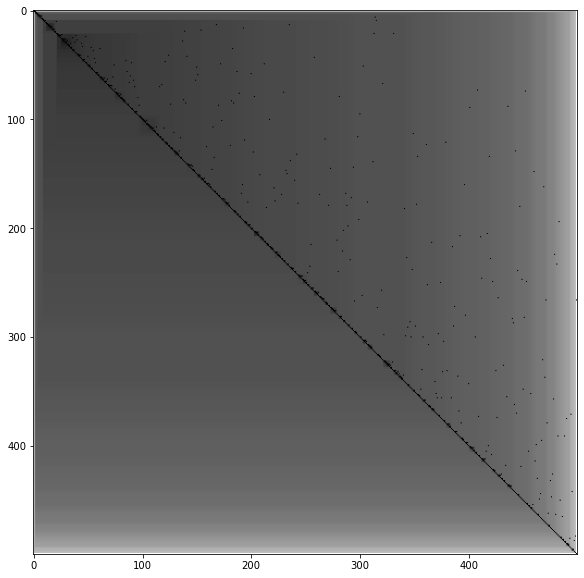

In [5]:
from sklearn import datasets
from pyclustertend import ivat
from sklearn.preprocessing import scale
X = scale(data_num_norm_tend)
ivat(X)  

Run/open cluster algorithims for further processing

In [6]:
#%run DBSCAN.ipynb

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.414336     0.636547         2.582317              0.515500   
1            -1.118662    -0.952137         0.253594             -0.936044   
2             1.225459     1.727593        -0.298830             -0.469302   
3             0.797362    -0.009458        -2.562691              1.959165   
4            -1.024748    -0.688189        -0.336661              1.131892   

   Yearly Amount Spent State group  
0             1.105305      MEDIUM  
1            -1.417115         LOW  
2             1.026716         LOW  
3             1.738679        HIGH  
4             0.249935      MEDIUM  
[[1.4143364563628242 0.6365474594878725 2.5823168093788094
  0.5154998813180399 1.105305408161924 'MEDIUM']
 [-1.118662492423174 -0.952137159924244 0.2535942694734955
  -0.9360443952833016 -1.4171153680727624 'LOW']
 [1.2254586596224635 1.7275933130333019 -0.298829533439401
  -0.46930224929487435 1.026716302

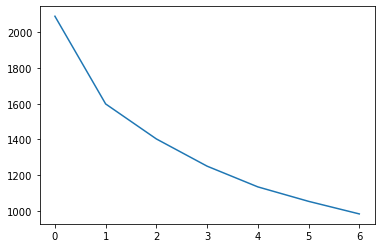

[array([[-0.43559124, -0.2431277 ,  0.12244666, -0.7592194 , -0.8534339 ],
       [ 0.05272048,  1.10987216,  0.23266711,  0.64982814,  1.0633812 ],
       [ 0.53548959, -0.55861024, -0.34694685,  0.49053036,  0.28718525]]), array([['LOW'],
       ['LOW'],
       ['HIGH']], dtype='<U4')]
[1 0 1 2 2 1 0 0 0 0 0 1 2 1 0 0 2 2 0 0 2 1 0 2 1 1 2 1 2 1 1 2 0 1 0 0 2
 2 1 2 0 1 2 1 0 1 1 2 0 0 0 1 0 0 2 0 2 1 2 2 0 2 2 2 0 2 1 2 2 0 0 0 0 2
 2 1 0 0 0 0 1 0 0 0 2 2 0 2 1 2 2 1 0 1 0 2 0 2 0 0 0 2 0 2 0 2 0 0 0 1 1
 2 1 2 1 0 2 1 2 0 0 1 0 0 2 2 2 0 2 1 0 0 2 0 0 2 0 2 0 2 1 0 0 0 1 0 1 0
 0 2 1 2 0 0 1 1 0 1 0 2 0 2 2 2 2 2 1 0 0 1 2 1 0 0 2 0 0 1 0 1 0 2 1 0 1
 0 0 1 0 1 2 1 0 1 1 0 0 1 2 2 0 0 1 1 1 1 0 1 1 1 0 1 2 0 0 0 0 1 0 1 0 2
 2 2 0 2 2 2 0 0 2 1 0 1 0 2 0 2 1 1 0 0 1 0 1 2 2 1 0 2 0 0 0 1 0 2 0 0 0
 0 0 1 2 2 1 0 2 0 2 0 0 1 2 2 2 0 1 0 0 1 0 0 2 0 1 2 0 1 2 2 0 0 0 0 2 0
 0 2 1 0 1 2 0 1 2 1 2 2 0 1 0 2 1 2 0 2 1 1 2 0 2 1 0 2 0 2 0 0 2 1 1 1 2
 2 2 1 1 1 0 2 0 0 0 1 2 0 2 2 1 0 2

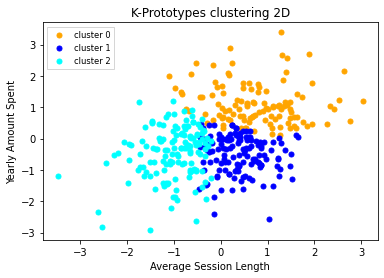

In [7]:
%run KPrototypes.ipynb


In [8]:
%run support_file.py

[-1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0

Internal cluster validation 

In [16]:
#Silhouette coefficient on k protoypes results  
#takes the idea of cohesion und separation into account 
#-1 = bad clustering, 0=overlapping clusters, 1=ideal homogenius clustering) 

metrics.silhouette_score(data_stand_DBSCAN, clusters_proto, metric='euclidean')


0.1476635473108109

In [17]:
#silhouette coefficient on DBSCAN results
metrics.silhouette_score(data_stand_DBSCAN, clusters_dbscan, metric='euclidean')

0.261901093127892

In [13]:
#Calinski-Harabasz Index (variance ratio criterion) k prototypes results 
#the higher the score the better the clusters are seperated from each other 
#probably only meaningful in direct relation to another algorithim 

metrics.calinski_harabasz_score(data_stand_DBSCAN, clusters_proto)

85.96342160875125

In [15]:
#Calinski-Harabasz Index (variance ratio criterion) DBSCAN results
metrics.calinski_harabasz_score(data_stand_DBSCAN, clusters_dbscan)

1.6342365008560702

In [57]:
metrics.calinski_harabasz_score(data_num, clusters)

ValueError: Found input variables with inconsistent numbers of samples: [500, 393]

In [31]:
#Davies-Bouldin Index on k prototypes results 
#0=lowest score by having best possible seperation 
davies_bouldin_score(data_num, data_clustering["clusters"])

0.5250572125475805

In [32]:
#Davies-Bouldin Index on DBSCAN results 
davies_bouldin_score(data_num, clusters)

ValueError: Found input variables with inconsistent numbers of samples: [500, 393]